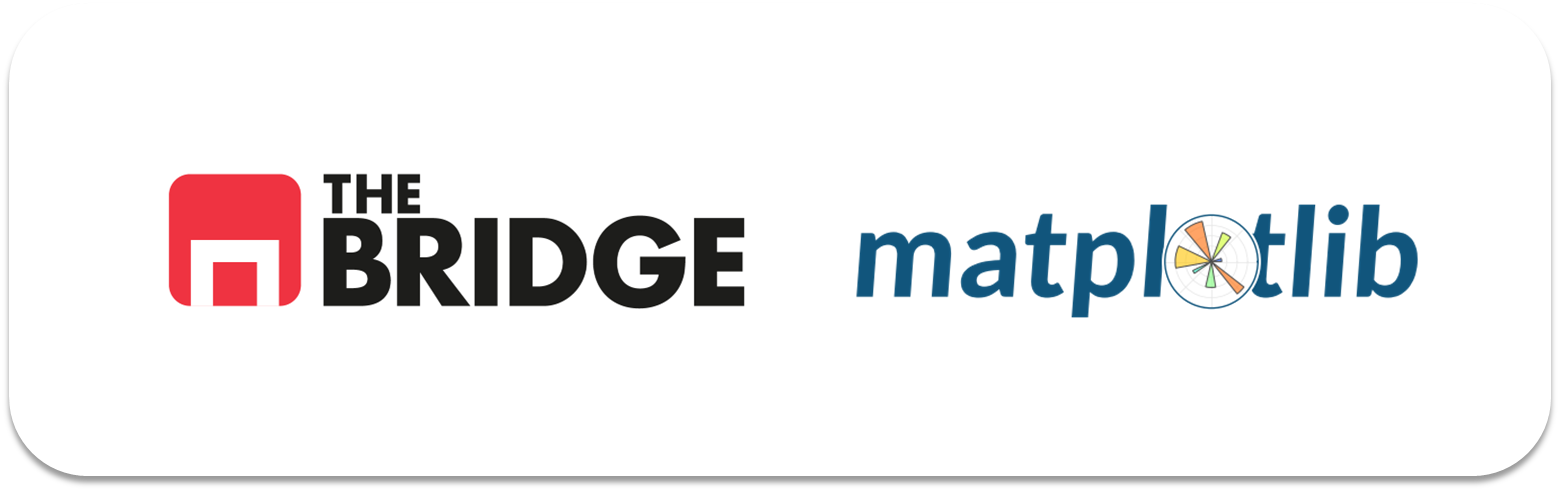

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [10]:
df = pd.read_csv("./data/california_cities.csv")
df=df.drop(columns= "Unnamed: 0" )
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                427 non-null    object 
 1   latd                427 non-null    float64
 2   longd               427 non-null    float64
 3   elevation_m         427 non-null    float64
 4   elevation_ft        427 non-null    float64
 5   population_total    427 non-null    int64  
 6   area_total_sq_mi    427 non-null    float64
 7   area_land_sq_mi     427 non-null    float64
 8   area_water_sq_mi    427 non-null    float64
 9   area_total_km2      427 non-null    float64
 10  area_land_km2       427 non-null    float64
 11  area_water_km2      427 non-null    float64
 12  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 46.7+ KB


In [45]:
df.nlargest(5, 'population_total')

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
359,Sacramento,38.555556,-121.468889,9.0,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19
9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92
386,SantaAna,33.740833,-117.881389,35.0,115.0,324528,27.518,27.270,0.248,71.271,70.628,0.643,0.90


,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

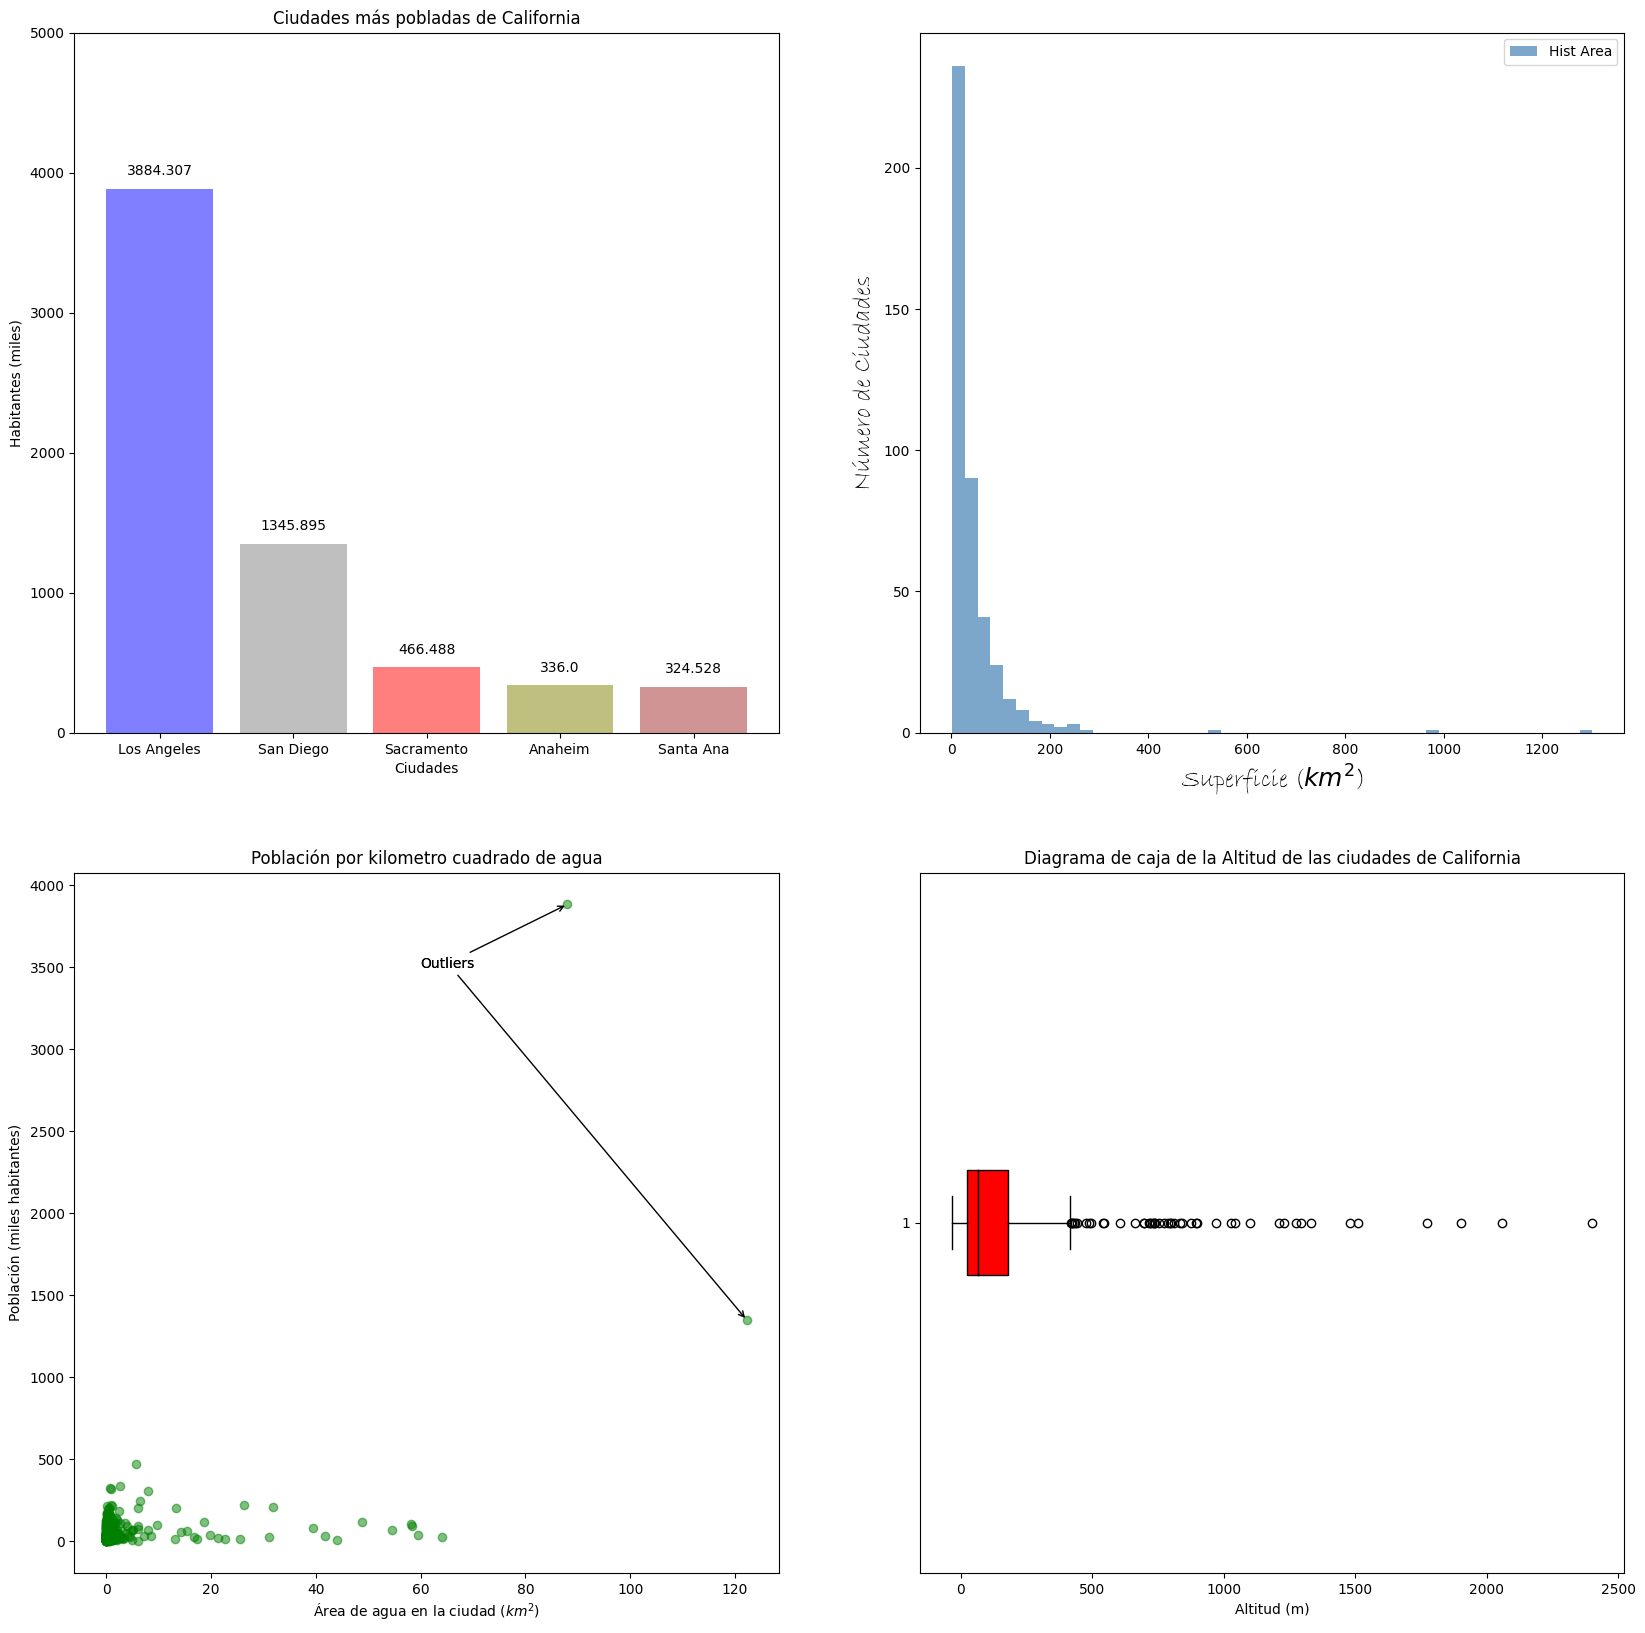

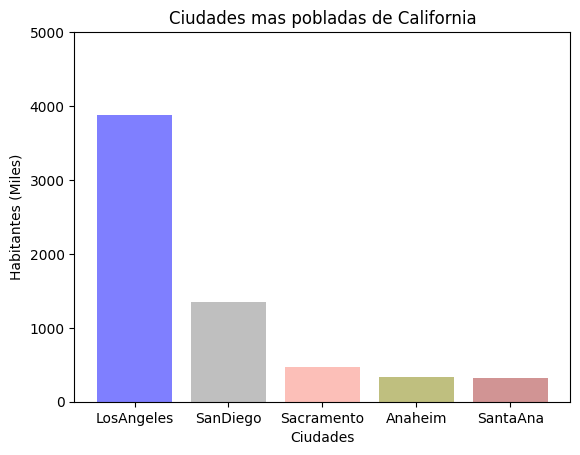

In [107]:
df_top5 = df.nlargest(5, 'population_total')
colores = ['blue', 'grey', 'salmon', 'olive', 'brown']
barras=plt.bar(df_top5['city'], df_top5['population_total']/1000, color=colores, alpha = 0.5)
plt.ylim((0,5000))
plt.xlabel('Ciudades')
plt.ylabel('Habitantes (Miles)')
plt.title('Ciudades mas pobladas de California')

#se que hay que hacer un for para poner los valores sobre las barras pero no me salio! xD
plt.show()

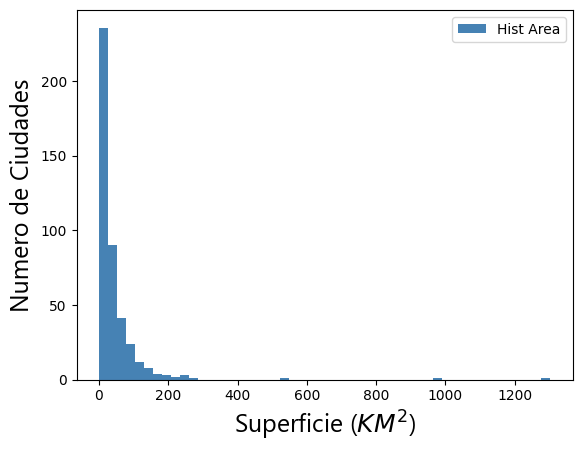

In [95]:
plt.hist(df["area_total_km2"], bins=50, color='steelblue', label = "Hist Area")
plt.xlabel('Superficie ($KM^2$)', fontfamily="Ebrima", fontsize=18)
plt.ylabel('Numero de Ciudades',fontfamily="Ebrima", fontsize=18)
plt.legend();
#se que la fuente se cambia en xlabel y ylabel pero no hubo manera de que me funcionara la fuente que pide Jaime.
plt.show()


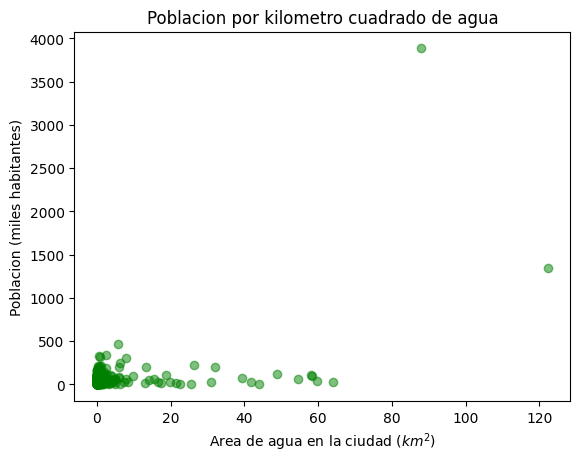

In [97]:
plt.scatter(df["area_water_km2"], df["population_total"]/1000, alpha = 0.5, color = "green")
plt.xlabel("Area de agua en la ciudad ($km^2$)")
plt.ylabel("Poblacion (miles habitantes)")
plt.title("Poblacion por kilometro cuadrado de agua")

plt.show()

Text(0.5, 1.0, 'Diagrama de caja de la altitud de las ciudades de California')

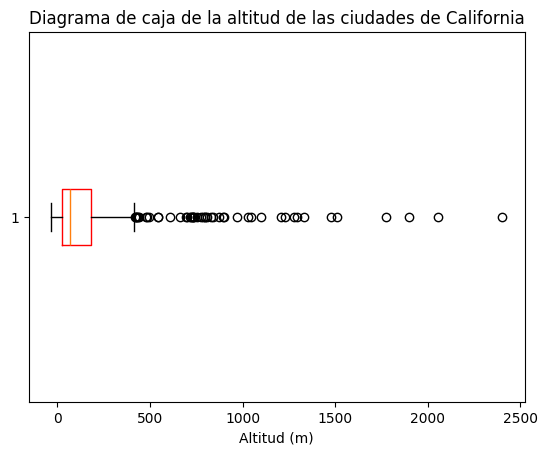

In [106]:
plt.boxplot(df["elevation_m"], vert=False, boxprops = dict(color="red"))
plt.xlabel("Altitud (m)")
plt.title ("Diagrama de caja de la altitud de las ciudades de California")

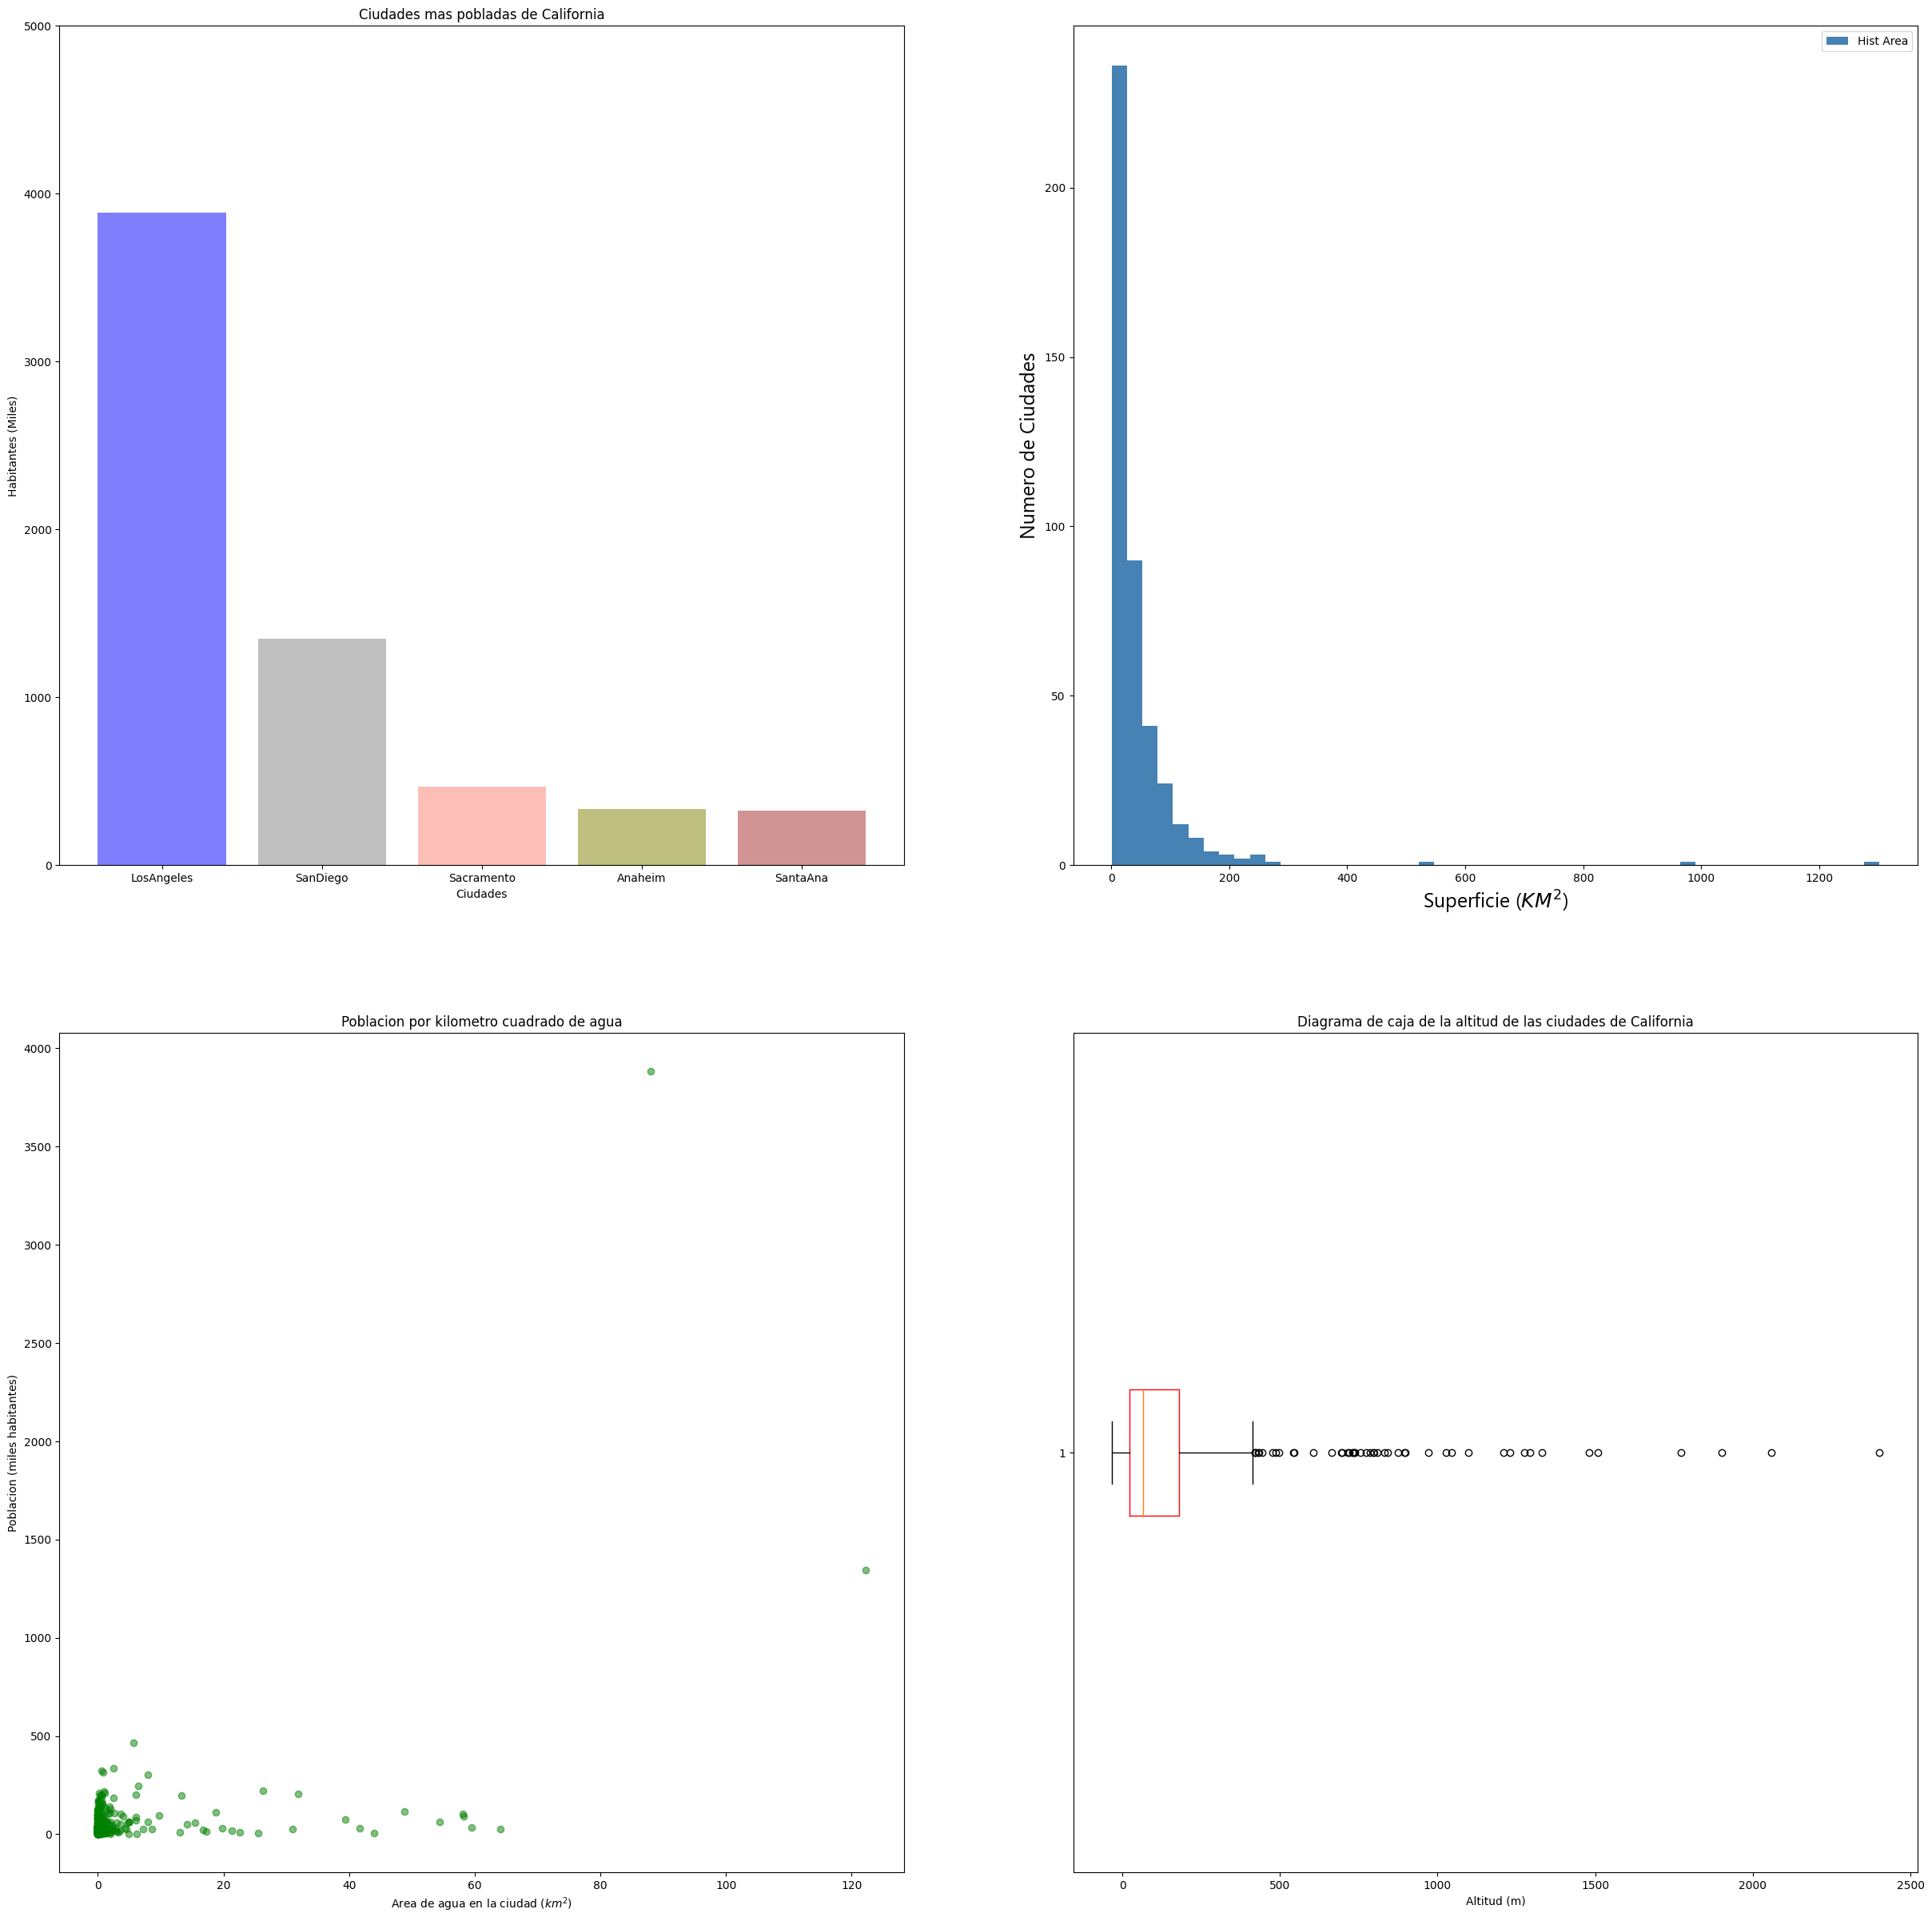

In [128]:
fig,axs = plt.subplots(2,2, figsize=(30,30))

# Primer grafico
df_top5 = df.nlargest(5, 'population_total')
colores = ['blue', 'grey', 'salmon', 'olive', 'brown']
barras = axs[0, 0].bar(df_top5['city'], df_top5['population_total'] / 1000, color=colores, alpha=0.5)
axs[0, 0].set_ylim((0, 5000))
axs[0, 0].set_xlabel('Ciudades')
axs[0, 0].set_ylabel('Habitantes (Miles)')
axs[0, 0].set_title('Ciudades mas pobladas de California')

# Segundo grafico
axs[0, 1].hist(df["area_total_km2"], bins=50, color='steelblue', label="Hist Area")
axs[0, 1].set_xlabel('Superficie ($KM^2$)', fontfamily="Ebrima", fontsize=18)
axs[0, 1].set_ylabel('Numero de Ciudades', fontfamily="Ebrima", fontsize=18)
axs[0, 1].legend()

# Tercer grafico
axs[1, 0].scatter(df["area_water_km2"], df["population_total"] / 1000, alpha=0.5, color="green")
axs[1, 0].set_xlabel("Area de agua en la ciudad ($km^2$)")
axs[1, 0].set_ylabel("Poblacion (miles habitantes)")
axs[1, 0].set_title("Poblacion por kilometro cuadrado de agua")

# Cuarto grafico
axs[1, 1].boxplot(df["elevation_m"], vert=False, boxprops=dict(color="red"))
axs[1, 1].set_xlabel("Altitud (m)")
axs[1, 1].set_title("Diagrama de caja de la altitud de las ciudades de California")
plt.show()

#no logre hacer que me funcionara la grafica con todas las graficas :/

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [130]:
fig.savefig('imagen_graficas.png')